In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from skimage import feature as F
import pickle as pk
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import os
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def accuracy(actual,predicted):  
      c = 0
      for i in range(len(actual)):
          if(actual[i]!=predicted[i]):
              continue
          else:    
              c = c + 1
      return c/len(actual)
      
def unpickle(file):
  train = []
  files = os.listdir(path)
  for f in files:
    if f[0]=='d':
      p = file + str(f)
      with open(p, 'rb') as fo:
        d = pk.load(fo, encoding='bytes')
        train.append(d)
    elif f =='test_batch':
      p = file + str(f)
      with open(p, 'rb') as fo:
        d = pk.load(fo, encoding='bytes')
        test = d
  return  train , test 

path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/cifar-10-batches-py/'
train , test  = unpickle(path)

In [5]:
YTrain = []
YTest = []
for i in train:
  YTrain.append(np.array(i[b'labels']))

YTrain = np.concatenate(YTrain,axis=0)
YTest = np.array(test[b'labels'])
Y = np.hstack((YTrain,YTest))           # Y- All test + train labels

In [6]:
print(Y.shape)

(60000,)


In [ ]:
# # 1.1.b. 
# # HOG-Hist Features

# def HOG(gray_img):
#   in_image = gray_img 
#   list = [0,8,16]
#   feature_vector = []          # overall 324 feature vector
#   for c in list:
#       c1 = int(c/8)                     # r1 - 0,1,2
#       for d in list:
#         d1 = int(d/8)                   # r2- 0,1,2
#         cell_vector = []                     # 36,1 feature vector
#         for i in range(c1,c1+2):
#             for j in range(d1,d1+2):
#                 temp = [0 for d in range(9)]
#                 mag = [[0 for d in range(8)] for f in range(8)]
#                 dir = [[0 for z in range(8)] for g in range(8)]
#                 for a in range(i*8,i*8+8):                      
#                     for b in range(j*8,j*8+8):
#                         if a == 0:                                                           # remove l and k as we have a and b. will add if any prb
#                           if b==0:  
#                             Gx = in_image[a][b+1]
#                             Gy = in_image[a+1][b]
#                           elif b==31:
#                             Gx = in_image[a][b-1]
#                             Gy = in_image[a+1][b]  
#                           else:
#                             Gx = abs(in_image[a][b+1]-in_image[a][b-1])
#                             Gy = in_image[a+1][b]  
                             
#                         elif a == 31:
#                           if b==0:  
#                             Gx = in_image[a][b+1]
#                             Gy = in_image[a-1][b]
#                           elif b==31:
#                             Gx = in_image[a][b-1]
#                             Gy = in_image[a-1][b]  
#                           else:
#                             Gx = abs(in_image[a][b+1]-in_image[a][b-1]) 
#                             Gy = in_image[a-1][b]
                             
#                         elif b == 0:
#                           if a==0:  
#                             Gx = in_image[a][b+1] 
#                             Gy = in_image[a+1][bin]
#                           elif a==31:
#                             Gx = in_image[a][b+1] 
#                             Gy = in_image[a-1][b]  
#                           else:
#                             Gx = in_image[a][b+1] 
#                             Gy = abs(in_image[a+1][b]-in_image[a-1][b])  
                                                                                         
#                         elif b == 31:
#                           if a==0:  
#                             Gx = in_image[a][b-1] 
#                             Gy = in_image[a+1][b]
#                           elif a==31:
#                             Gx = in_image[a][b-1]
#                             Gy = in_image[a-1][b]  
#                           else:
#                             Gx = in_image[a][b-1] 
#                             Gy = abs(in_image[a+1][b]-in_image[a-1][b])
                         
#                         else:  
#                             Gx = abs(in_image[a][b+1]-in_image[a][b-1])
#                             Gy = abs(in_image[a+1][b]-in_image[a-1][b])
                           
#                         if a<8 and b<8: 
#                           mag[a][b] = math.hypot(Gx,Gy)
#                           dir[a][b] = math.atan(1.0*Gy/Gx)*180/np.pi  
                  
#                 temp1 = filling( mag, dir, temp)  
#                 cell_vector = cell_vector + temp1  
#         res = sum(map(lambda q : q * q, cell_vector))
#         norm = math.sqrt(res)
#         for x in cell_vector:
#             feature_vector.append(1.0*x/(norm + 0.0000001))
         
#   return feature_vector             

# def filling(mag, dir, temp):
#   for l in range(8):
#     for k in range(8):
#       if dir[l][k]<=19:
#         temp[0]=temp[0]+mag[l][k]
#       elif 20<=dir[l][k]<=39:
#         temp[1]=temp[1]+ mag[l][k]
#       elif 40<= dir[l][k]<=59:    
#         temp[2]=temp[2]+ mag[l][k]
#       elif 60<= dir[l][k]<=79:    
#         temp[3]=temp[3]+ mag[l][k]
#       elif 80<= dir[l][k]<=99:    
#         temp[4]=temp[4]+ mag[l][k]
#       elif 100<= dir[l][k]<=119:    
#         temp[5]=temp[5]+ mag[l][k]
#       elif 120<=dir[l][k]<=139:    
#         temp[6]=temp[6]+ mag[l][k]
#       elif 140<=dir[l][k]<=159:    
#         temp[7]=temp[7]+mag[l][k]
#       elif 160<=dir[l][k]<=180:    
#         temp[8]=temp[8]+mag[l][k]
#   return temp

# for i in train:
#   YTrain.append(np.array(i[b'labels']))
#   XTrain.append(i[b'data'])
# XTrain = np.concatenate(XTrain,axis=0)
# YTrain = np.concatenate(YTrain,axis=0)
# YTest = np.array(test[b'labels'])
# XTest = test[b'data']
# train_images_no, img_pixles = XTrain.shape
# test_images_no = XTest.shape[0]

# All_features = []
# for im in range(train_images_no + test_images_no ):
#   data = np.concatenate((XTrain,XTest), axis=0)
#   img = data[im]
#   img_reshape = img.reshape(32,32,3)
#   gray_img = cv2.cvtColor(img_reshape, cv2.COLOR_BGR2GRAY)
#   x = HOG(gray_img)
#   All_features.append(x)
# All__hog_features_array = np.array(All_features)
# print(All__hog_features_array.size)

# XTrain_hist = []           # size of XTrain is (50000,3072) - 50000 images each of size 3072 pixels
# XTest_hist = []
# YTrain_hist = []          #list which have 5 array as lables of each data_batch
# YTest_hist = []

# def Hist(hue_img):
#   row,col = hue_img.shape
#   temp2 = [0 for d in range(9)]
#   for i in range(row):
#     for j in range(col):
#       if hue_img[i][j]<=19:
#         temp2[0]=temp2[0]+1
#       elif 20<=hue_img[i][j] <=39:
#         temp2[1]=temp2[1]+ 1
#       elif 40<= hue_img[i][j] <=59:    
#         temp2[2]=temp2[2]+ 1
#       elif 60<= hue_img[i][j] <=79:    
#         temp2[3]=temp2[3]+ 1
#       elif 80<= hue_img[i][j] <=99:    
#         temp2[4]=temp2[4]+ 1
#       elif 100<= hue_img[i][j] <=119:    
#         temp2[5]=temp2[5]+ 1
#       elif 120<= hue_img[i][j] <=139:    
#         temp2[6]=temp2[6]+ 1
#       elif 140<= hue_img[i][j] <=159:    
#         temp2[7]=temp2[7]+ 1
#       elif 160<= hue_img[i][j] <=180:    
#         temp2[8]=temp2[8]+ 1
#   return temp2

# All_hist_features = []
# for i in train:
#   YTrain_hist.append(np.array(i[b'labels']))
#   XTrain_hist.append(i[b'data'])
# XTrain = np.concatenate(XTrain_hist,axis=0)
# YTrain = np.concatenate(YTrain_hist,axis=0)
# YTest = np.array(test[b'labels'])
# XTest = test[b'data']
# train_images_no, img_pixles = XTrain.shape
# test_images_no = XTest.shape[0]
# for im in range(train_images_no + test_images_no ):
#   data = np.concatenate((XTrain,XTest), axis=0)
#   img = data[im]
#   img_reshape = img.reshape(32,32,3)
#   hue_1 = cv2.cvtColor(img_reshape, cv2.COLOR_BGR2HSV)
#   hue_img = hue_1[:,:,0]
#   x = Hist(hue_img)
#   All_hist_features.append(x)

# All_hist_features_array = np.array(All_hist_features)
# print(All_hist_features_array.size)

# final_features = np.hstack((All__hog_features_array, All_hist_features_array))
# print(type(final_features))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# features_path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/All_features'
# pk.dump(final_features, open(features_path, "wb"))

In [7]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/All_features'
Reddata = pk.load(open(path,'rb')) 

In [8]:
print(Reddata.shape)

(60000, 333)


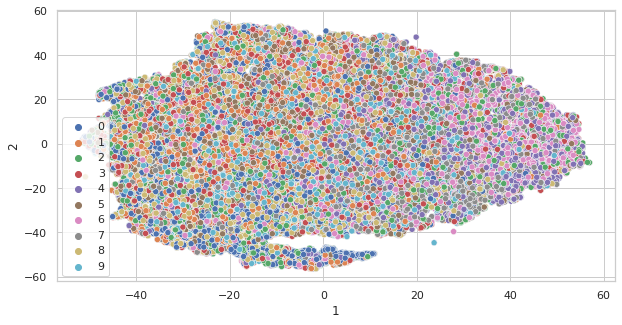

In [ ]:
# 1.2.

def UTSNE(Data,Label):
  tsne = TSNE(n_components=2)
  df1_i_2 = tsne.fit_transform(Data)
    
  df1_tsne_1 = pd.concat([pd.DataFrame(df1_i_2,columns=['1','2']) ,pd.DataFrame(Label,columns=['Label'])],axis=1)
    
  plt.figure(figsize=(10,5))
  sn.set(style = 'whitegrid')
  sn.scatterplot(data= df1_tsne_1,x='1',y='2',hue='Label',palette="deep")
  plt.legend()
  plt.show()

UTSNE(Reddata,Y)      

In [ ]:
# 1.3.
# def GridCV(XTrain,YTrain):
#   paragrid = [{'kernel': ['rbf'],  'C': [10,100,1000]}]
#   s1 = SVC()
#   gridcv = GridSearchCV( s1 , paragrid ,  cv=5  , scoring= 'accuracy' )
#   gridcv.fit(XTrain, YTrain)
#   return gridcv

# gridcv = GridCV(Reddata[:50000],Y[:50000])
# print(gridcv.best_score_)

In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridhog1'
# pk.dump(gridcv, open(path, "wb"))

In [9]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridhog1'
gridcv = pk.load(open(path,'rb')) 
print(gridcv.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [10]:
XTest = Reddata[50000:60000]
YTest = Y[50000:60000]

In [ ]:

# def GetOptimalValues(gridcv,XTrain,YTrain,XTest,YTest):
#   kernel = gridcv.best_params_['kernel']
#   if(kernel =='linear'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C'])  
#     s.fit(XTrain,YTrain)
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   elif (kernel =='rbf'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C']) 
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     s.fit(XTrain,YTrain)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   return s  

# op = GetOptimalValues(gridcv,Reddata[:50000],Y[:50000],XTest,YTest)


In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridhog2'
# pk.dump(op, open(path, "wb"))

In [11]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridhog2'
op = pk.load(open(path,'rb')) 
s = op
def GetOptimalValues(s,XTrain,YTrain,XTest,YTest):
  print('Optimal Parameters values : ',gridcv.best_params_)
  YPredTrain = s.predict(XTrain)
  YPredTest = s.predict(XTest)
  print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain))*100,3),'%')
  print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest))*100,3),'%')
  
GetOptimalValues(s,Reddata[:50000],Y[:50000],XTest,YTest)

Optimal Parameters values :  {'C': 100, 'kernel': 'rbf'}
Training Accuracy :  27.288 %
Testing Accuracy :  27.46 %


In [ ]:
# 1.4.
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridhog2'
# op = pk.load(open(path,'rb')) 

# NewXTrain = []
# index = op.support_
# NewYTrain = []

# index.sort()
# for i in index:
#   NewYTrain.append(Y[i])
#   NewXTrain.append(Reddata[i])

# NewXTrain = np.array(NewXTrain) 
# NewYTrain = np.array(NewYTrain)

# def NONSV(XTrain,YTrain,XTest,YTest):
#   kernel = gridcv.best_params_['kernel']
#   if(kernel =='linear'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C'])  
#     s.fit(XTrain,YTrain)
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
    
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   elif (kernel =='rbf'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C']) 
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     s.fit(XTrain,YTrain)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   return s  
# op2 = NONSV(NewXTrain,NewYTrain,XTest,YTest)


In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.4/gridhog1'
# pk.dump(op2, open(path, "wb"))

In [ ]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.4/gridhog1'
op = pk.load(open(path,'rb')) 
s = op

NewXTrain = []
index = op.support_
NewYTrain = []
index.sort()
for i in index:
  NewYTrain.append(Y[i])
  NewXTrain.append(Reddata[i])
NewXTrain = np.array(NewXTrain) 
NewYTrain = np.array(NewYTrain)

def NONSV(XTrain,YTrain,XTest,YTest):
    print('Only Support vectors : ')
    print('Optimal Parameters values : ',gridcv.best_params_)
    YPredTrain = s.predict(XTrain)
    YPredTest = s.predict(XTest)
    print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain))*100,3),'%')
    print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest))*100,3),'%')

NONSV(NewXTrain,NewYTrain,XTest,YTest)

Only Support vectors : 
Optimal Parameters values :  {'C': 100, 'kernel': 'rbf'}
Training Accuracy :  27.336 %
Testing Accuracy :  27.48 %
